In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample

In [2]:
fs = 250  # sampling rate (Hz)
n_e = 300  # number of epochs
T = 10  # length of epochs (s)
f = 10  # frequency of sinusoids (Hz)
t = np.arange(0, T, 1 / fs)
A = 1  # noise amplitude
sigma = 0.5  # Gaussian noise variance

data = []

phase_differences = [0, -np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
for ps in zip(phase_differences):
    sig = []
    for _ in range(n_e):
        sig.append(np.sin(2 * np.pi * f * t - ps) +
                   A * np.random.normal(0, sigma, size=t.shape))
    data.append(sig)

data = np.swapaxes(np.array(data), 0, 1)  # make epochs the first dimension
print(data)

[[[-0.85466675 -0.56648602  0.37646519 ... -0.48025461 -0.82461791
   -0.28541925]
  [-0.10532495 -0.41266888  0.08410494 ...  0.66537246  0.9486827
   -0.03524097]
  [ 1.57299141  0.910299    1.17513309 ...  0.80121911  1.15537536
    0.36825834]
  [ 0.33826403  0.80343707  0.59216665 ... -0.95373514  0.41280906
   -0.06594404]
  [-1.02117834 -0.97240724 -1.6640975  ... -0.37781132 -0.92053491
   -1.19478764]
  [-0.55129304  0.2925195  -1.20618593 ...  0.90230002  0.04452242
   -0.13241686]]

 [[ 0.45838223  0.2269245   1.72361773 ... -0.93975748 -1.01372169
   -0.1782364 ]
  [ 0.46889174 -0.42506155 -0.03802147 ...  2.24247015  0.35719072
   -0.47809624]
  [ 1.23738986  2.16935518  1.42944816 ...  1.1326605   1.13130888
    1.07679256]
  [-0.44021597 -0.26084553  0.20920376 ... -1.06733216  0.21951113
    0.27984   ]
  [-1.12650408 -1.13449784 -0.76921988 ... -0.85852346  0.04497023
   -1.31909309]
  [-0.13896822 -0.10538434 -0.05149214 ...  0.79734033  0.7134821
    0.43974907]]

 [

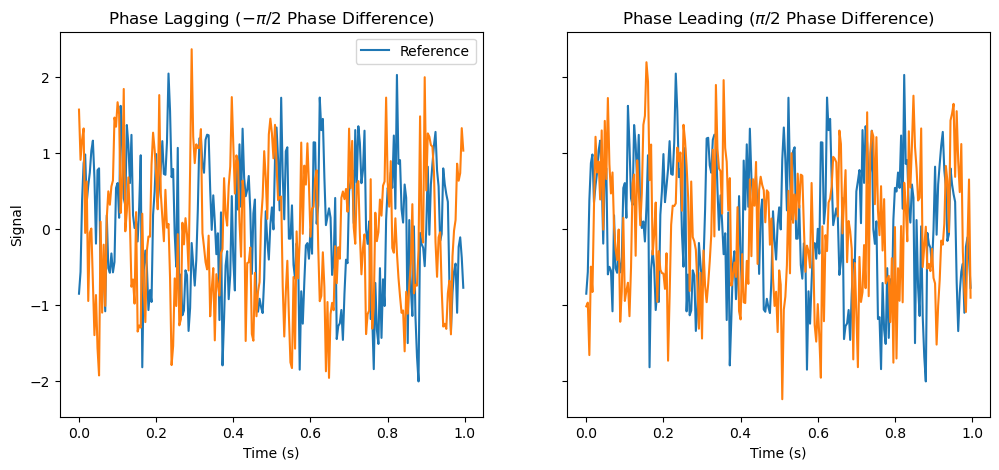

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax[0].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[0].plot(t[:fs], data[0, 2, :fs])

ax[0].set_title(r"Phase Lagging ($-\pi/2$ Phase Difference)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Signal")
ax[0].legend()

ax[1].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[1].plot(t[:fs], data[0, 4, :fs])
ax[1].set_title(r"Phase Leading ($\pi/2$ Phase Difference)")
ax[1].set_xlabel("Time (s)")

plt.show()